# Statistical Interpretation and Exploratory Data Analysis
## Analysis of the Human Development Index (HDI)

**Module:** Concepts and Technologies of AI (5CS037)  
**Student Name:** Prince Kumar Mali
**Assignment:** Assignment I  
**Dataset:** Human_Development_Index_Dataset.csv  


## Problem 1A: Single Year HDI Exploration (2022)

In [1]:
import pandas as pd
import numpy as np

# Import dataset with correct encoding
hdi = pd.read_csv(
    "Human_Development_Index_Dataset.csv",
    encoding="latin1"
)


# Problem 1A
## 1A-1) Extract Latest Year:

In [2]:
hdi["year"].unique()
hdi_2022_df = hdi[hdi["year"] == 2022].copy()
hdi_2022_df.to_csv("hdi 2022 df.csv", index=False)


## 1A-2)Data Exploration:

In [3]:
hdi_2022_df.head(10)
hdi_2022_df.shape
hdi_2022_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64
 1

## 1A-3) Missing Values & Data Cleaning:

In [4]:
hdi_2022_df.isna().sum()
hdi_2022_df.replace("—", np.nan, inplace=True)
numeric_cols = [
    "hdi",
    "gross_inc_percap",
    "life_expectancy",
    "gender_development"
]

for col in numeric_cols:
    hdi_2022_df[col] = pd.to_numeric(
        hdi_2022_df[col],
        errors="coerce"
    )
hdi_2022_df.duplicated().sum()
hdi_2022_df.drop_duplicates(inplace=True)
hdi_2022_df.dropna(subset=["hdi"], inplace=True)

In [5]:
hdi_2022_df_clean = hdi_2022_df.dropna(subset=["hdi"]).copy()
hdi_2022_df_clean.shape


(204, 30)

## 1A-4) Basic Statistics:

In [6]:
mean_hdi = hdi_2022_df["hdi"].mean()
median_hdi = hdi_2022_df["hdi"].median()
std_hdi = hdi_2022_df["hdi"].std()

mean_hdi, median_hdi, std_hdi
hdi_2022_df.loc[
    hdi_2022_df["hdi"].idxmax(),
    ["country", "hdi"]
]
hdi_2022_df.loc[
    hdi_2022_df["hdi"].idxmin(),
    ["country", "hdi"]
]


,5345
country,Somalia
hdi,0.38


## 1A-5) Filtering and Sorting:

In [7]:
high_hdi = hdi_2022_df[hdi_2022_df["hdi"] > 0.800]
high_hdi_sorted = high_hdi.sort_values(
    by="gross_inc_percap",
    ascending=False
)
high_hdi_sorted.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


## 1A-6) Adding HDI Category Column:

In [8]:
def classify_hdi(hdi_value):
    if hdi_value < 0.550:
        return "Low"
    elif 0.550 <= hdi_value <= 0.699:
        return "Medium"
    elif 0.700 <= hdi_value <= 0.799:
        return "High"
    else:
        return "Very High"
hdi_2022_df["HDI Category"] = hdi_2022_df["hdi"].apply(classify_hdi)
hdi_2022_df["HDI Category"].value_counts()
hdi_2022_df.to_csv("HDI category added.csv", index=False)


# Problem 1B (2020-2022)



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with proper encoding
hdi = pd.read_csv(
    "Human_Development_Index_Dataset.csv",
    encoding="latin1"
)


## 1B-1) Data Extraction and Saving:

In [10]:
hdi_2020_2022 = hdi[hdi["year"].isin([2020, 2021, 2022])].copy()
hdi_2020_2022.to_csv("HDI problem1B.csv", index=False)


## 1B-2)Data Cleaning:

In [11]:
hdi_2020_2022[["hdi", "country", "year"]].isna().sum()
hdi_2020_2022.replace("–", np.nan, inplace=True)

numeric_cols = [
    "hdi",
    "gross inc percap",
    "life expectancy",
    "gender development"
]

for col in numeric_cols:
    if col in hdi_2020_2022.columns:
        hdi_2020_2022[col] = pd.to_numeric(
            hdi_2020_2022[col],
            errors="coerce"
        )
hdi_2020_2022.duplicated().sum()
hdi_2020_2022.drop_duplicates(inplace=True)
hdi_2020_2022.dropna(subset=["hdi", "country", "year"], inplace=True)
hdi_2020_2022.to_csv("HDI problem1B.csv", index=False)


## 1B-3A) Visualization Tasks:

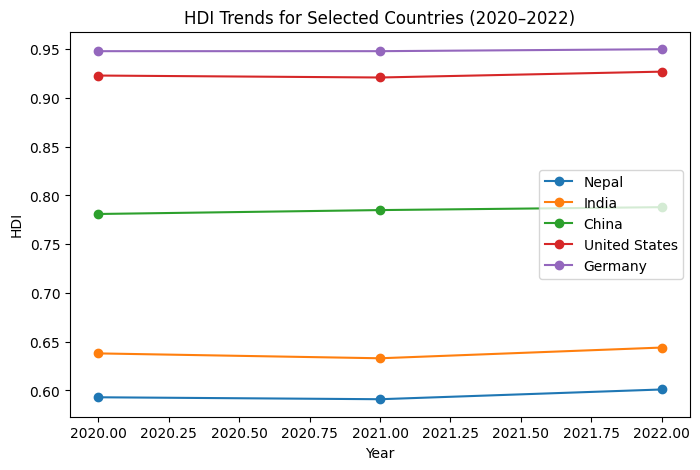

In [12]:
selected_countries = [
    "Nepal", "India", "China", "United States", "Germany"
]

country_trend = hdi_2020_2022[
    hdi_2020_2022["country"].isin(selected_countries)
]
plt.figure(figsize=(8,5))

for country in selected_countries:
    subset = country_trend[country_trend["country"] == country]
    plt.plot(subset["year"], subset["hdi"], marker="o", label=country)

plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Trends for Selected Countries (2020–2022)")
plt.legend()
plt.show()


## 1B 3B Generate Visualizations:
Bar Chart: Average HDI by Region (2020–2022)


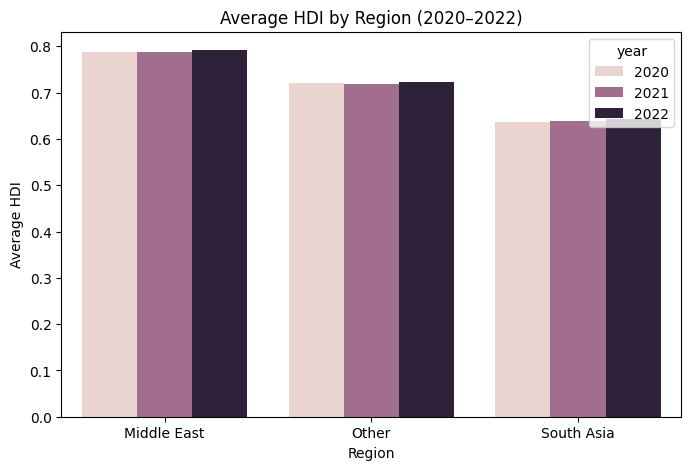

In [13]:
# Define regions (These lists are already available from cell s7XdKnmLgyTA in Problem 3)
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan",
    "India", "Maldives", "Nepal",
    "Pakistan", "Sri Lanka"
]

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria",
    "United Arab Emirates", "Yemen"
]

# Create a 'region' column in hdi_2020_2022
hdi_2020_2022['region'] = 'Other'
hdi_2020_2022.loc[hdi_2020_2022['country'].isin(south_asia_countries), 'region'] = 'South Asia'
hdi_2020_2022.loc[hdi_2020_2022['country'].isin(middle_east_countries), 'region'] = 'Middle East'

region_year_hdi = (
    hdi_2020_2022
    .groupby(["region", "year"])["hdi"]
    .mean()
    .reset_index()
)
plt.figure(figsize=(8,5))
sns.barplot(
    data=region_year_hdi,
    x="region",
    y="hdi",
    hue="year"
)

plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region (2020–2022)")
plt.show()

Box Plot: HDI Distribution for 2020, 2021, and 2022

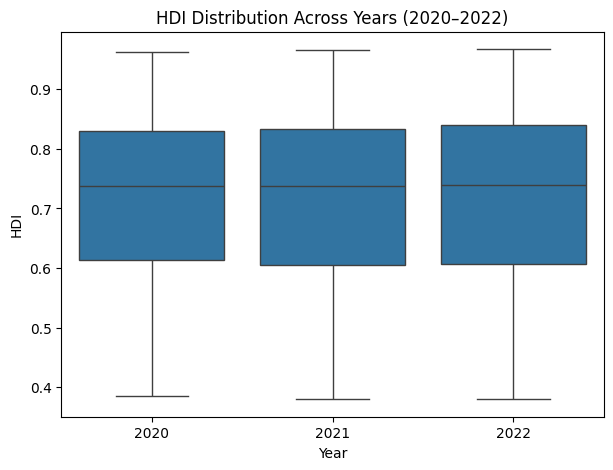

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=hdi_2020_2022,
    x="year",
    y="hdi"
)

plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Distribution Across Years (2020–2022)")
plt.show()


Scatter Plot: HDI vs. GNI per Capita

In [15]:
if "gross inc percap" in hdi_2020_2022.columns:
    plt.figure(figsize=(7,5))
    sns.regplot(
        data=hdi_2020_2022,
        x="gross inc percap",
        y="hdi",
        scatter_kws={"alpha": 0.5}
    )
    plt.xlabel("GNI per Capita Index")
    plt.ylabel("HDI")
    plt.title("HDI vs GNI per Capita (2020–2022)")
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


GNI per Capita variable not available in the dataset.


1B 4 Short Analysis Questions:

In [16]:
hdi_change = (
    hdi_2020_2022
    .pivot(index="country", columns="year", values="hdi")
)

hdi_change["HDI Change"] = hdi_change[2022] - hdi_change[2020]
hdi_change.sort_values("HDI Change", ascending=False).head(5)
hdi_change[hdi_change["HDI Change"] < 0].sort_values("HDI Change")
region_avg = hdi_2020_2022.groupby("region")["hdi"].mean()
region_avg


,hdi
region,
Middle East,0.788909
Other,0.720787
South Asia,0.639583


# Problem 2
Advanced HDI Exploration

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
hdi = pd.read_csv("Human_Development_Index_Dataset.csv", encoding="latin1")

# Filter for years 2020–2022
hdi = hdi[hdi["year"].between(2020, 2022)].copy()


1. Create South Asia Subset:

In [18]:
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

south_asia = hdi[hdi["country"].isin(south_asia_countries)].copy()

# Save for submission
south_asia.to_csv("HDI SouthAsia.csv", index=False)


2. Composite development score

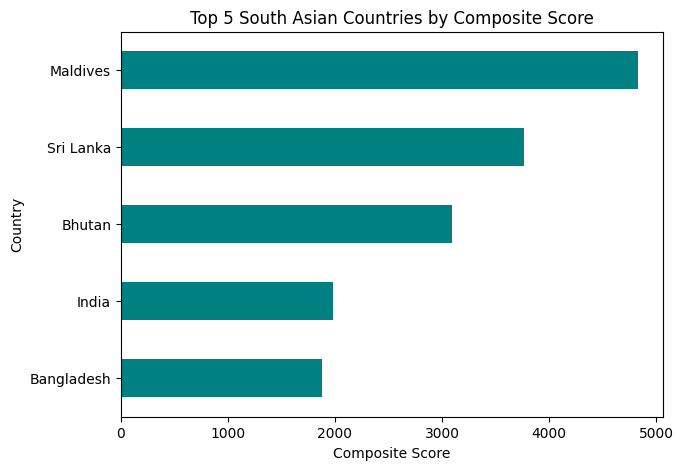

,HDI Rank,Composite Rank
country,,
Afghanistan,8.0,8.0
Bangladesh,4.0,5.0
Bhutan,3.0,3.0
India,5.0,4.0
Maldives,2.0,1.0
Nepal,6.0,7.0
Pakistan,7.0,6.0
Sri Lanka,1.0,2.0


In [19]:
south_asia["Composite Score"] = (
    0.30 * south_asia["life_expectancy"] +
    0.30 * south_asia["gross_inc_percap"]
)
composite_rank = south_asia.groupby("country")["Composite Score"].mean().sort_values(ascending=False)
composite_rank
top5_composite = composite_rank.head(5)

plt.figure(figsize=(7,5))
top5_composite.plot(kind="barh", color="teal")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.gca().invert_yaxis()
plt.show()
hdi_rank = south_asia.groupby("country")["hdi"].mean().sort_values(ascending=False)
comparison = pd.DataFrame({
    "HDI Rank": hdi_rank.rank(ascending=False),
    "Composite Rank": composite_rank.rank(ascending=False)
})
comparison

3. Outlier Detection:

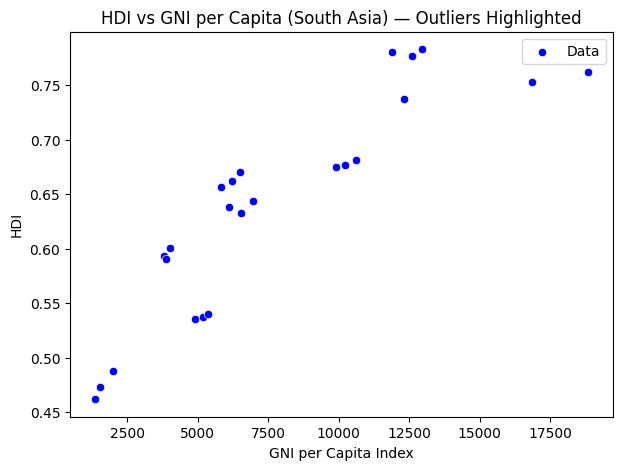

In [20]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5*IQR) | (df[column] > Q3 + 1.5*IQR)]
    return outliers

outliers_hdi = detect_outliers(south_asia, "hdi")
outliers_gni = detect_outliers(south_asia, "gross_inc_percap") # Corrected column name
plt.figure(figsize=(7,5))
sns.scatterplot(data=south_asia, x="gross_inc_percap", y="hdi", color="blue", label="Data") # Corrected column name
sns.scatterplot(data=outliers_gni, x="gross_inc_percap", y="hdi", color="red", label="Outliers", s=100) # Corrected column name
plt.xlabel("GNI per Capita Index")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita (South Asia) — Outliers Highlighted")
plt.legend()
plt.show()

4. Exploring Metric Relationships:

Pearson correlation between HDI and gender_development: 0.874
Pearson correlation between HDI and life_expectancy: 0.939


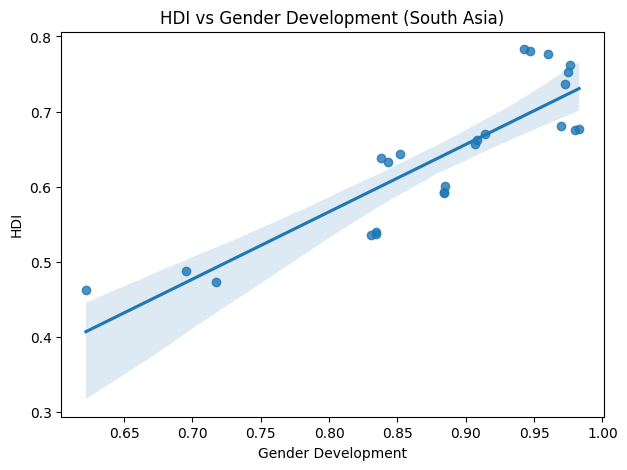

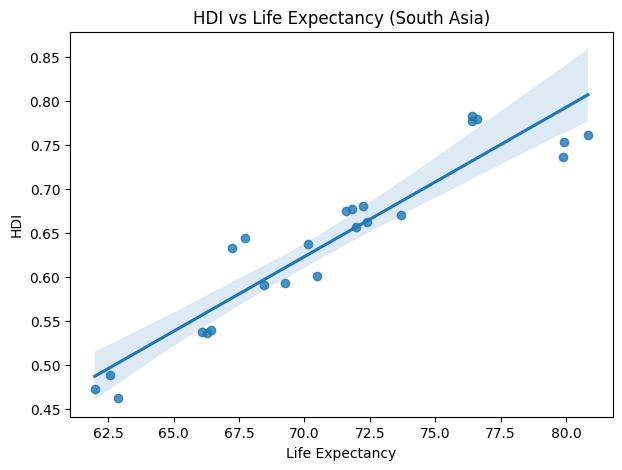

In [21]:
metrics = ["gender_development", "life_expectancy"]
for metric in metrics:
    corr = south_asia[["hdi", metric]].corr().iloc[0,1]
    print(f"Pearson correlation between HDI and {metric}: {corr:.3f}")
for metric in metrics:
    plt.figure(figsize=(7,5))
    sns.regplot(data=south_asia, x=metric, y="hdi")
    plt.xlabel(metric.replace('_', ' ').title())
    plt.ylabel("HDI")
    plt.title(f"HDI vs {metric.replace('_', ' ').title()} (South Asia)")
    plt.show()

5. Gap Analysis:

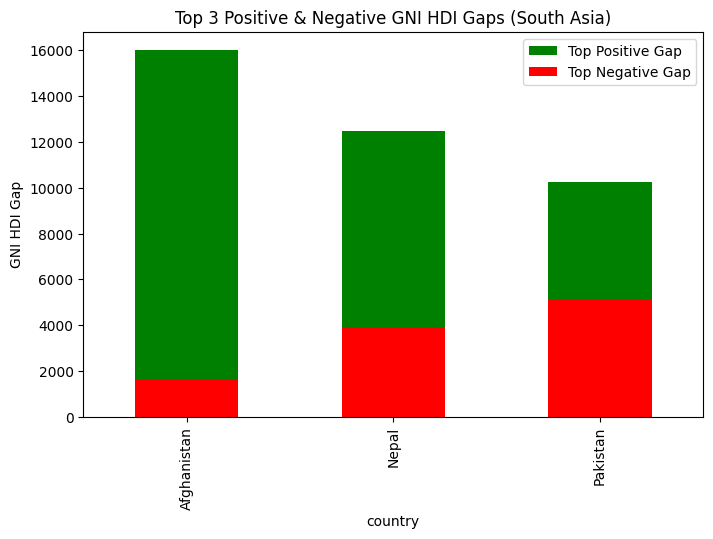

In [22]:
south_asia["GNI HDI Gap"] = south_asia["gross_inc_percap"] - south_asia["hdi"]

gap_desc = south_asia.groupby("country")["GNI HDI Gap"].mean().sort_values(ascending=False)
gap_asc = south_asia.groupby("country")["GNI HDI Gap"].mean().sort_values(ascending=True)

top3_positive = gap_desc.head(3)
top3_negative = gap_asc.head(3)

plt.figure(figsize=(8,5))
top3_positive.plot(kind="bar", color="green", label="Top Positive Gap")
top3_negative.plot(kind="bar", color="red", label="Top Negative Gap")
plt.ylabel("GNI HDI Gap")
plt.title("Top 3 Positive & Negative GNI HDI Gaps (South Asia)")
plt.legend()
plt.show()

# Problem 3 - South Asia vs Middle East Comparision

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
hdi = pd.read_csv("Human_Development_Index_Dataset.csv", encoding="latin1")

# Filter years 2020–2022
hdi = hdi[hdi["year"].between(2020, 2022)]


## 1. Create Middle East Subset:

In [24]:
# Define regions
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan",
    "India", "Maldives", "Nepal",
    "Pakistan", "Sri Lanka"
]

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria",
    "United Arab Emirates", "Yemen"
]

# Create subsets
south_asia = hdi[hdi["country"].isin(south_asia_countries)].copy()
middle_east = hdi[hdi["country"].isin(middle_east_countries)].copy()

# Save CSV files
south_asia.to_csv("HDI SouthAsia 2020 2022.csv", index=False)
middle_east.to_csv("HDI MiddleEast 2020 2022.csv", index=False)


## 2. Descriptive Statistics:

In [25]:
stats = pd.DataFrame({
    "South Asia Mean": south_asia["hdi"].mean(),
    "South Asia Std": south_asia["hdi"].std(),
    "Middle East Mean": middle_east["hdi"].mean(),
    "Middle East Std": middle_east["hdi"].std()
}, index=["HDI"])

print(stats)


     South Asia Mean  South Asia Std  Middle East Mean  Middle East Std
HDI         0.639583        0.098273          0.788909         0.141295


## 3. Top and Bottom Performers:

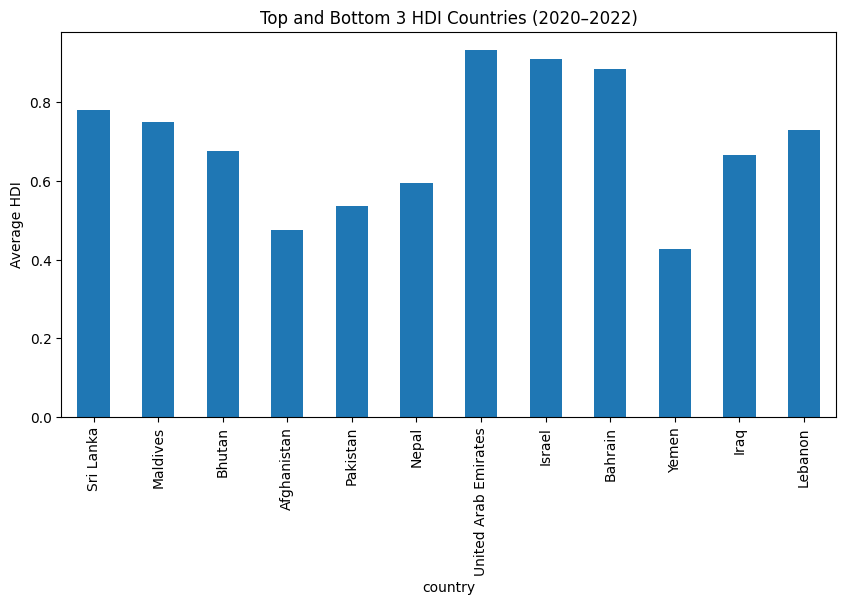

In [26]:
def top_bottom(df):
    avg_hdi = df.groupby("country")["hdi"].mean()
    return avg_hdi.nlargest(3), avg_hdi.nsmallest(3)

sa_top, sa_bottom = top_bottom(south_asia)
me_top, me_bottom = top_bottom(middle_east)

# Combine for plotting
combined = pd.concat([
    sa_top, sa_bottom, me_top, me_bottom
])

combined.plot(kind="bar", figsize=(10,5))
plt.title("Top and Bottom 3 HDI Countries (2020–2022)")
plt.ylabel("Average HDI")
plt.show()


## 4. Metric Comparisons:

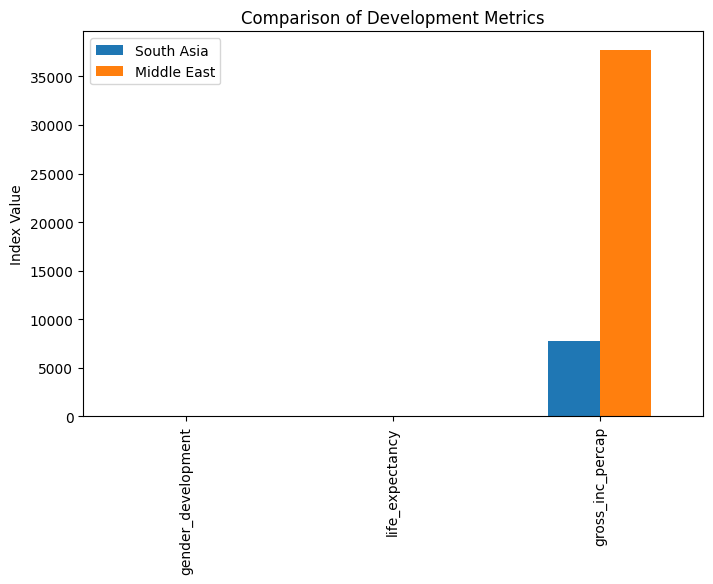

In [27]:
metrics = [
    "gender_development",
    "life_expectancy",
    "gross_inc_percap"
]

metric_means = pd.DataFrame({
    "South Asia": south_asia[metrics].mean(),
    "Middle East": middle_east[metrics].mean()
})

metric_means.plot(kind="bar", figsize=(8,5))
plt.title("Comparison of Development Metrics")
plt.ylabel("Index Value")
plt.show()


## 5. HDI Disparity:

In [28]:
def variation_metrics(df):
    return pd.Series({
        "Range": df["hdi"].max() - df["hdi"].min(),
        "Coefficient of Variation": df["hdi"].std() / df["hdi"].mean()
    })

variation = pd.DataFrame({
    "South Asia": variation_metrics(south_asia),
    "Middle East": variation_metrics(middle_east)
})

print(variation)


                          South Asia  Middle East
Range                       0.321000     0.513000
Coefficient of Variation    0.153652     0.179101


## 6. Correlation Analysis:

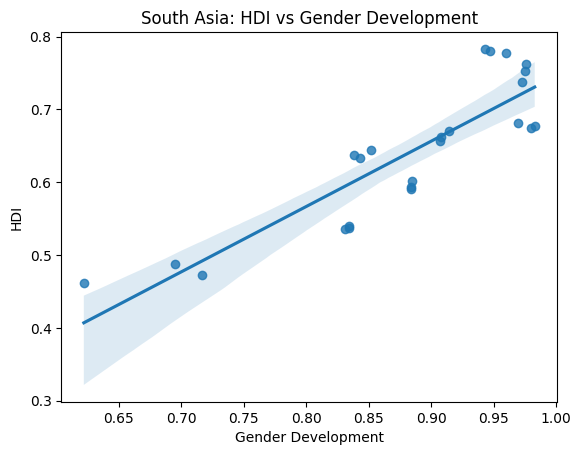

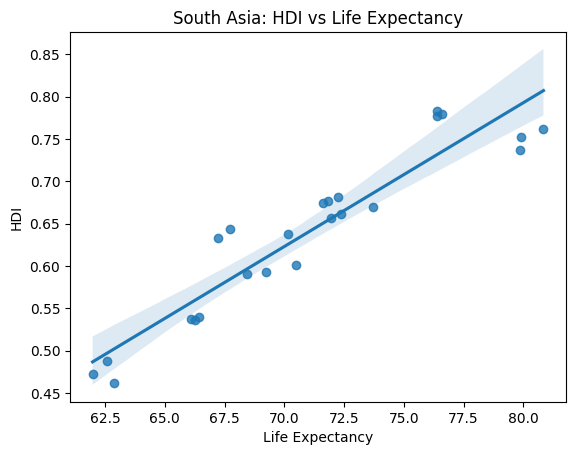

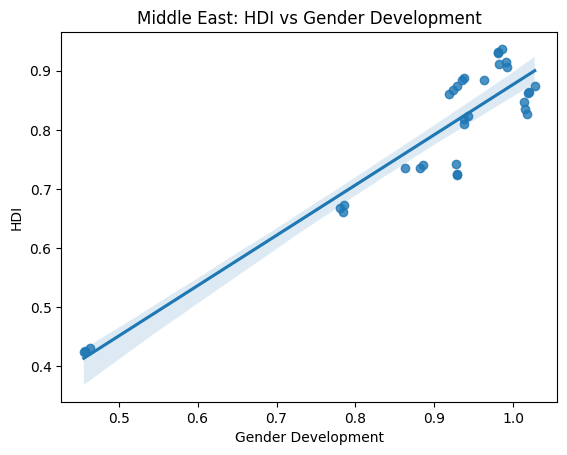

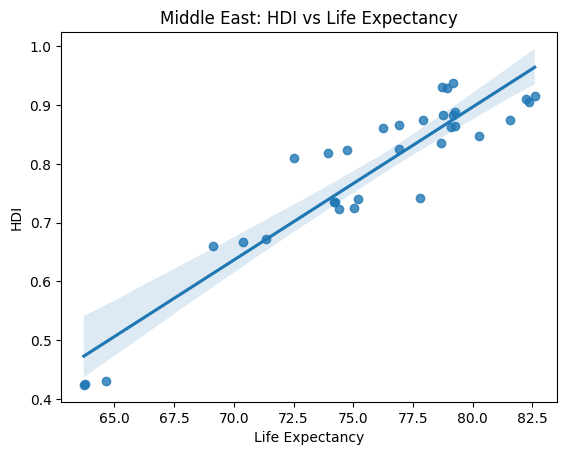

In [29]:
for region, df in [("South Asia", south_asia), ("Middle East", middle_east)]:
    for metric in ["gender_development", "life_expectancy"]:
        sns.regplot(x=metric, y="hdi", data=df)
        plt.title(f"{region}: HDI vs {metric.replace('_', ' ').title()}")
        plt.xlabel(metric.replace('_', ' ').title())
        plt.ylabel("HDI")
        plt.show()


## 7. Outlier Detection:

/tmp/ipython-input-351539780.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


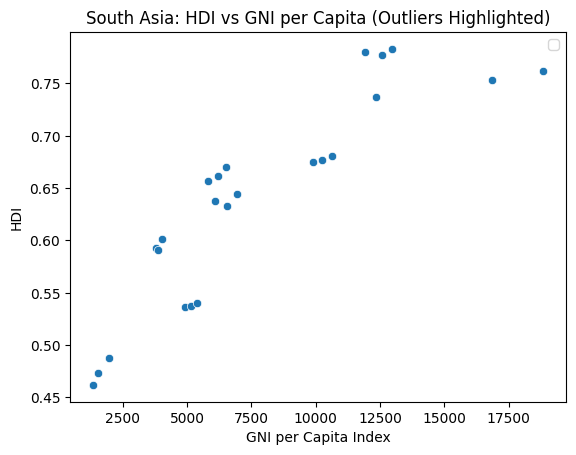

/tmp/ipython-input-351539780.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers["gross_inc_percap"] = pd.to_numeric(outliers["gross_inc_percap"], errors="coerce")


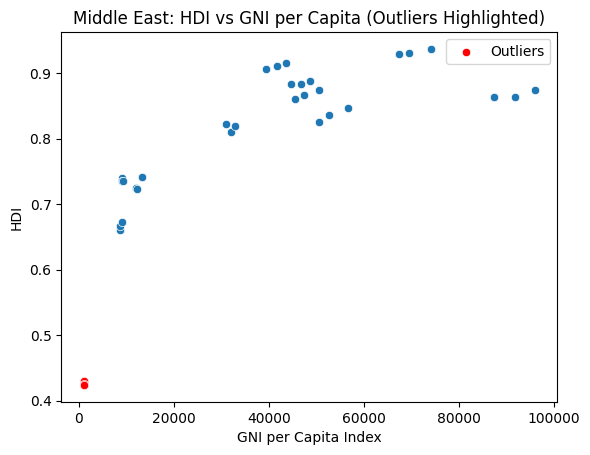

In [30]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < Q1 - 1.5*IQR) |
              (df[column] > Q3 + 1.5*IQR)]

for region, df in [("South Asia", south_asia), ("Middle East", middle_east)]:
    outliers = detect_outliers(df, "hdi")

    # Ensure 'gross_inc_percap' is numeric
    df["gross_inc_percap"] = pd.to_numeric(df["gross_inc_percap"], errors="coerce")
    outliers["gross_inc_percap"] = pd.to_numeric(outliers["gross_inc_percap"], errors="coerce")

    sns.scatterplot(x="gross_inc_percap", y="hdi", data=df)
    sns.scatterplot(x="gross_inc_percap", y="hdi",
                    data=outliers, color="red", label="Outliers")

    plt.title(f"{region}: HDI vs GNI per Capita (Outliers Highlighted)")
    plt.xlabel("GNI per Capita Index")
    plt.ylabel("HDI")
    plt.legend()
    plt.show()